<a href="https://colab.research.google.com/github/Idowuilekura/idowu10academy3rdbatch/blob/master/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='notebook',style='dark')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#telecom = pd.read_excel('/content/drive/My Drive/data_science_project/Week2_challenge_data_source.xlsx')
#telecom.to_pickle("/content/drive/My Drive/data_science_project/telecom.pkl")
telecom=pd.read_pickle('/content/drive/My Drive/data_science_project/telecom.pkl')

In [4]:
telecom.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [145]:
telecom['Handset Type'].fillna(telecom['Handset Type'].mode(),inplace=True)

In [146]:
telecom['Average_RTT_total'] = (telecom['Avg RTT DL (ms)'] + telecom['Avg RTT UL (ms)'])*(10**-6)

In [148]:
telecom['Average_throughput'] = (telecom['Avg Bearer TP DL (kbps)'] + telecom['Avg Bearer TP UL (kbps)']) * (10**-3)

In [149]:
telecom['Average_TCP_retrans'] = (telecom['TCP DL Retrans. Vol (Bytes)']+telecom['TCP UL Retrans. Vol (Bytes)']) *(10**-6)

In [154]:
mean_of_columns=telecom[['Average_RTT_total','Average_throughput','Average_TCP_retrans']].mean().to_dict()

In [156]:
telecom.fillna(mean_of_columns,inplace=True)

In [6]:
# dropping msisdn/number null values
telecom.dropna(axis=0,subset=['MSISDN/Number'],inplace=True)

In [7]:
#replacing nan values with mode
telecom['Handset Manufacturer'].fillna(telecom['Handset Manufacturer'].mode(),inplace=True)

In [8]:
#replacing nan values with mode
telecom['Handset Type'].fillna(telecom['Handset Type'].mode(),inplace=True)

In [9]:
replacement = telecom[['Total UL (Bytes)','Total DL (Bytes)','Dur. (ms).1']].mean().to_dict()
replacement
telecom.fillna(replacement,inplace=True)

In [10]:
telecom.shape

(148935, 55)

In [11]:
# calculating the top handsets used by the customer excluding handsets that is undefined
top_10_used_handset_type=telecom[telecom['Handset Type']!='undefined'].groupby("Handset Type")['Handset Type'].count().nlargest(10)
top_10_used_handset_type

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: Handset Type, dtype: int64

In [12]:
# calaculating the percentage of the top ten with respect to the total length of the column
top_10_used_handset_type.sum()/len(telecom[telecom['Handset Type']!='undefined'])*100

50.83926173537899

The result of our analysis shows that most of the users use expensive phones and this accounts for about half of the users. This shows that our users are composed of very rich individuals.

In [13]:
# top 3 handset manufacturers 
top_3_handset_manufacturers = telecom.groupby("Handset Manufacturer")['Handset Manufacturer'].count().nlargest(3)
top_3_handset_manufacturers

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

In [14]:
top_3_handset_manufacturers.sum()/len(telecom[telecom['Handset Manufacturer']!='undefined'])

0.960036856089826

The top 3 handset manufacturers are Apple, Samsung and Huawei and they are the most common with a percentage of 95%. This shows that almost all the users uses phones that are made by these 3 companies, recalling some known facts shows that most of the phones made by these manufacturers are expensive

In [15]:
top_3_names = list(top_3_handset_manufacturers.index)
for col in top_3_names:
  print(col) 
  print(telecom.groupby(['Handset Manufacturer','Handset Type'])['Handset Type'].count().loc[col].nlargest(5))
  print("***********************************************************************************************************************")

Apple
Handset Type
Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64
***********************************************************************************************************************
Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64
***********************************************************************************************************************
Huawei
Handset Type
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64
********************************************************

From here we could see that the five top phones per manufacturer are quite expensive for example the least Apple phone is around $120 dollars. This shows that most users are wealthy 

univariate analaysis

Bearer Id    1.0
Name: 0.1, dtype: float64

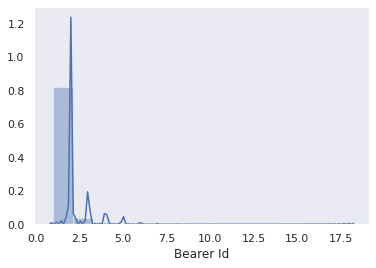

In [16]:
user_per_session_number =telecom.groupby('MSISDN/Number').agg({'Bearer Id':'count'})
#print(user_per_session_number.describe())
sns.distplot(user_per_session_number['Bearer Id'],bins=15)
# removing outliers
#print(user_per_session_number.isnull().sum())
#sns.boxplot(user_per_session_number
user_per_session_number.quantile(0.10)

In [17]:
user_per_session_number.describe()

,Bearer Id
count,106856.000000
mean,1.393792
std,0.806022
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


from the above information we could see that the maximum xDr session for each participant is 18 and the minimun is 1. The 75 percentile is 2 and maximum is 18( it shows that most of the users xDr session is from 1 to 2) with few exceptions of users with 18 sessions. This might mean that most users initiated the connection once and after the session ended did not initiate another session

In [18]:
print(list(telecom.columns))

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [19]:
telecom['total_datavolume_game'] = (telecom['Gaming DL (Bytes)']+telecom['Gaming UL (Bytes)'])*(10**-6)

         Dur. (ms).1
count  106856.000000
mean        2.436132
std         3.105983
min         0.119050
25%         1.188472
50%         1.712337
75%         2.880000
max       309.229391


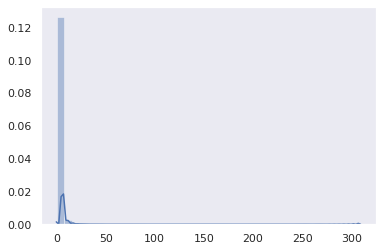

In [20]:
telecom['Dur. (ms).1'] = ((telecom['Dur. (ms).1'])/(6*10**7)) # converting to microseconds
user_per_dur=telecom.groupby("MSISDN/Number").agg({'Dur. (ms).1':'sum'})
user_per_dur
max_user_per_dur = user_per_dur.nlargest(1,'Dur. (ms).1')
#print(max_user_per_dur)
min_user_per_dur = user_per_dur.nsmallest(1,'Dur. (ms).1')
# converting from ms to minutes with describe
print(user_per_dur.describe())
sns.distplot(user_per_dur,bins=40)

From the above we could see that the minimum session is about 0.12 minutes, the average is about 2,43 minutes, the 75th percentile is around 2.88 minutes) and the maximum is around 309 minutes( seems to be an outlier, we will deal with it in the next sesison. This shows that the users spends less hours while browsing, this seems to be a bad indication to invest in it, though we will explore it further

,Dur. (ms).1
count,106856.000000
mean,1.946271
std,1.137047
min,0.119050
25%,1.188472
50%,1.712337
75%,2.592375
max,5.416524


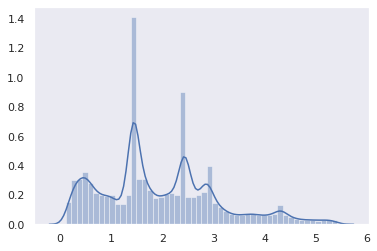

In [21]:
q1 = user_per_dur.quantile(0.25)
q3 = user_per_dur.quantile(0.75)
iqr = q3-q1
lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr
#outliers = np.where(user_per_dur>upper_whisker)
not_outlier= user_per_dur[~((user_per_dur<lower_whisker)|(user_per_dur>upper_whisker))]
not_outlier.fillna(user_per_dur.mean(),inplace=True)
user_per_dur = not_outlier
sns.distplot(user_per_dur)
user_per_dur.describe()

In [22]:
print(telecom.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [23]:
telecom['Total_socialmedia_bytes'] = (telecom['Social Media DL (Bytes)'] + telecom['Social Media UL (Bytes)'])*(10**-6)

       Total_gaming_bytes
count       106856.000000
mean           599.769011
std            449.150462
min              0.306358
25%            288.063112
50%            542.349207
75%            777.304138
max           7749.432234


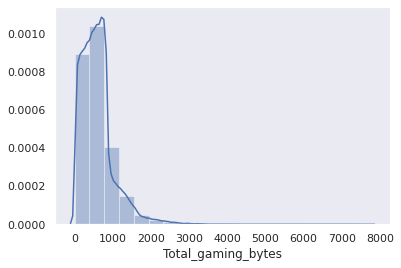

In [24]:
telecom['Total_gaming_bytes'] = (telecom['Gaming DL (Bytes)']+telecom['Gaming UL (Bytes)'])*(1*10**-6)
telecom_gaming=telecom.pivot_table(index='MSISDN/Number',values='Total_gaming_bytes',aggfunc=sum)
#round(telecom.pivot_table(index='MSISDN/Number',values='Total_gaming_bytes',aggfunc=sum).describe()*(1*10**-6),3)
fig,ax = plt.subplots()
print(telecom_gaming.describe())
sns.distplot(telecom_gaming['Total_gaming_bytes'],bins=20,ax=ax)
plt.savefig('telecom_uni.png')

,Total_gaming_bytes
count,106856.000000
mean,541.922483
std,323.486336
min,0.306358
25%,288.063112
50%,542.349207
75%,739.384381
max,1511.138983


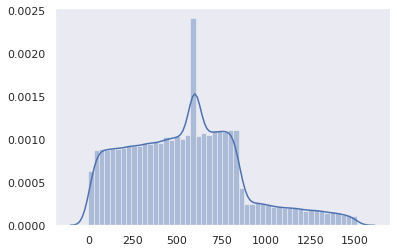

In [25]:
# dealing with outliers
q1 = telecom_gaming.quantile(0.25)
q3 = telecom_gaming.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = telecom_gaming[~((telecom_gaming<lower_whisk)|(telecom_gaming>upper_whisk))]
#non_outliers.fillna(telecom_gaming.mean())
non_outliers.fillna(telecom_gaming.mean(),inplace=True)
telecom_gaming = non_outliers
sns.distplot(telecom_gaming)
telecom_gaming.describe()

       Total_netflix_bytes
count           106856.000
mean                31.538
std                 21.290
min                  0.185
25%                 18.556
50%                 26.719
75%                 37.977
max                399.519


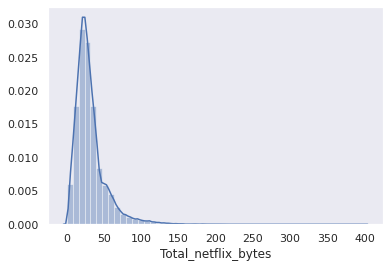

In [26]:
telecom['Total_netflix_bytes'] = (telecom['Netflix DL (Bytes)']+telecom['Netflix UL (Bytes)'])*(1*10**-6)
print(round(telecom.pivot_table(index='MSISDN/Number',values='Total_netflix_bytes',aggfunc=sum).describe(),3))
telecom_netflix=telecom.pivot_table(index='MSISDN/Number',values='Total_netflix_bytes',aggfunc=sum)
fig,ax = plt.subplots()
sample_10 = telecom_netflix.sample(100,random_state=1)
sns.distplot(telecom_netflix['Total_netflix_bytes'],ax=ax)

,Total_netflix_bytes
count,106856.000000
mean,27.924655
std,13.345094
min,0.184569
25%,18.555973
50%,26.718889
75%,34.572072
max,67.103969


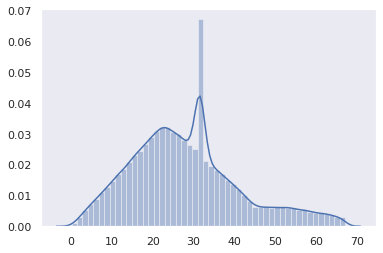

In [27]:
q1 = telecom_netflix.quantile(0.25)
q3 = telecom_netflix.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = telecom_netflix[~((telecom_netflix<lower_whisk)|(telecom_netflix>upper_whisk))]
#non_outliers.fillna(telecom_netflix.mean())
non_outliers.fillna(telecom_netflix.mean(),inplace=True)
telecom_netflix = non_outliers
sns.distplot(telecom_netflix)
telecom_netflix.describe()

       Total_youtube_bytes
count           106856.000
mean                31.558
std                 21.295
min                  0.079
25%                 18.631
50%                 26.800
75%                 37.928
max                452.959


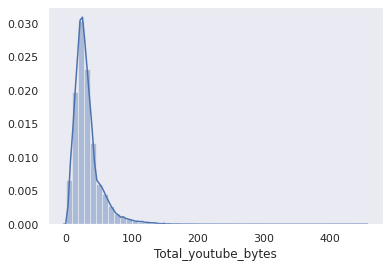

In [28]:
telecom['Total_youtube_bytes'] = (telecom['Youtube DL (Bytes)']+telecom['Youtube UL (Bytes)'])*(10**-6)
user_by_youtube = telecom.groupby("MSISDN/Number").agg({'Total_youtube_bytes':'sum'})
print(round(user_by_youtube.describe(),3))
sample_10 = user_by_youtube.sample(100,random_state=1)
fig,ax = plt.subplots()
sns.distplot(user_by_youtube['Total_youtube_bytes'],ax=ax)
#ax.set_xscale('log')

,Total_youtube_bytes
count,106856.000000
mean,31.558399
std,21.294918
min,0.078903
25%,18.631088
50%,26.800376
75%,37.927976
max,452.958769


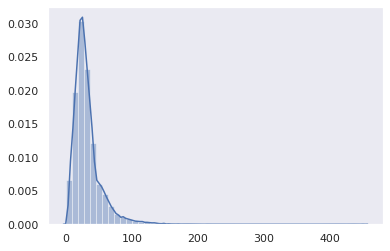

In [29]:
q1 = user_by_youtube.quantile(0.25)
q3 = user_by_youtube.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_youtube[~((user_by_youtube<lower_whisk)|(user_by_youtube>upper_whisk))]
#non_outliers.fillna(telecom_youtube.mean())
non_outliers.fillna(user_by_youtube.mean(),inplace=True)
telecom_youtube = non_outliers
sns.distplot(user_by_youtube)
user_by_youtube.describe()

       Total_email_bytes
count         106856.000
mean               3.149
std                2.222
min                0.018
25%                1.674
50%                2.800
75%                3.847
max               42.419


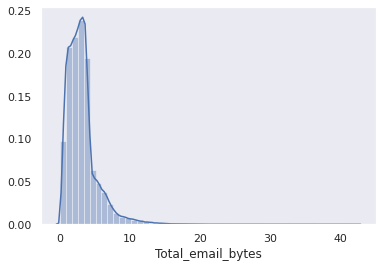

In [30]:
telecom['Total_email_bytes'] = (telecom['Email DL (Bytes)']+telecom['Email UL (Bytes)'])*(10**-6)
user_by_email = telecom.groupby('MSISDN/Number').agg({'Total_email_bytes':'sum'})
print(round(user_by_email.describe(),3))
fig,ax= plt.subplots()
sns.distplot(user_by_email['Total_email_bytes'],ax=ax)
#ax.set_xscale('log')


,Total_email_bytes
count,106856.000000
mean,2.803581
std,1.463577
min,0.018176
25%,1.674481
50%,2.799824
75%,3.611720
max,7.105100


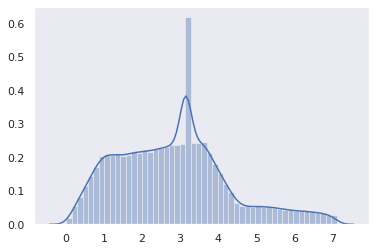

In [31]:
q1 = user_by_email.quantile(0.25)
q3 = user_by_email.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_email[~((user_by_email<lower_whisk)|(user_by_email>upper_whisk))]
#non_outliers.fillna(telecom_gaming.mean())
non_outliers.fillna(user_by_email.mean(),inplace=True)
user_by_email = non_outliers
sns.distplot(user_by_email)
user_by_email.describe()

       Total_google_bytes
count          106856.000
mean               10.882
std                 7.545
min                 0.040
25%                 5.943
50%                 9.586
75%                13.215
max               152.192


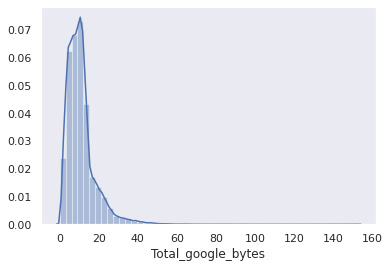

In [32]:
telecom['Total_google_bytes'] = (telecom['Google UL (Bytes)'] + telecom['Google DL (Bytes)'])*(10**-6)
user_by_google=telecom.groupby('MSISDN/Number').agg({'Total_google_bytes':'sum'})
print(round(user_by_google.describe(),3)) #to convert to mb
sns.distplot(user_by_google['Total_google_bytes'])

,Total_google_bytes
count,106856.000000
mean,9.676310
std,4.900680
min,0.040330
25%,5.942636
50%,9.586153
75%,12.243159
max,24.122202


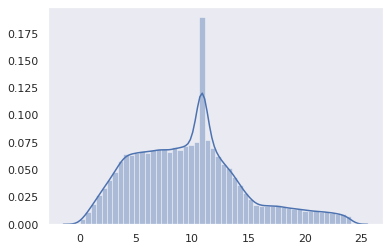

In [33]:
q1 = user_by_google.quantile(0.25)
q3 = user_by_google.quantile(0.75)
iqr = q3-q1
lower_whisk = 1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_google[~((user_by_google<lower_whisk)|(user_by_google>upper_whisk))]
#non_outliers.fillna(telecom_gaming.mean())
non_outliers.fillna(user_by_google.mean(),inplace=True)
user_by_google = non_outliers
sns.distplot(user_by_google)
user_by_google.describe()

       Total_socialmedia_bytes
count               106856.000
mean                     2.548
std                      1.908
min                      0.002
25%                      1.211
50%                      2.304
75%                      3.308
max                     43.375


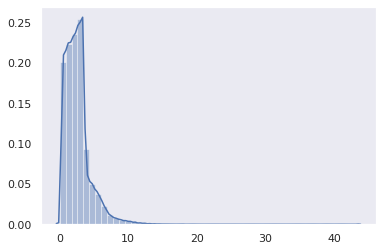

In [34]:
user_by_social_media=telecom.groupby('MSISDN/Number').agg({'Total_socialmedia_bytes':'sum'})
print(round(user_by_social_media.describe(),3))
#sample_100 = user_by_social_media.sample(100,random_state=1)
fig,ax = plt.subplots()
sns.distplot(user_by_social_media,ax=ax)
#ax.set_xscale('log')

From the above table we could see that the minimum total bytes for social media is 0.002 mb, the average is around 2.5 mb, the 75 percentile is around 3.308 while the max is around 43.375mb, with a small standard deviation of about about 1.9 mb, this shows that most of the users total bytes is around 1 to 3,this might mean that the network coverage is bad or most users use phones that are not 4g enabled

,Total_socialmedia_bytes
count,106856.000000
mean,2.306857
std,1.384353
min,0.001563
25%,1.211281
50%,2.303756
75%,3.153077
max,6.451407


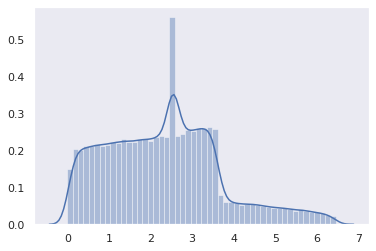

In [35]:
q1 = user_by_social_media.quantile(0.25)
q3 = user_by_social_media.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_social_media[~((user_by_social_media<lower_whisk)|(user_by_social_media>upper_whisk))]
#non_outliers.fillna(telecom_gaming.mean())
non_outliers.fillna(user_by_social_media.mean(),inplace=True)
user_by_social_media = non_outliers
sns.distplot(user_by_social_media)
user_by_social_media.describe()

In [36]:
telecom['Total_volume_bytes'] = (telecom['Total DL (Bytes)'] + telecom['Total UL (Bytes)'])*(10**-6)

       Total_volume_bytes
count          106856.000
mean              690.962
std               491.056
min                33.249
25%               358.550
50%               617.923
75%               857.435
max              8846.226


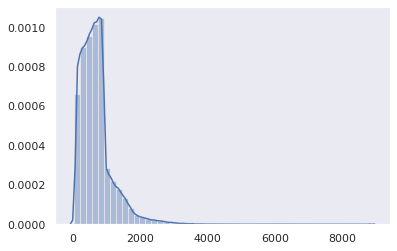

In [37]:
user_by_total_volume=telecom.groupby('MSISDN/Number').agg({'Total_volume_bytes':'sum'})
print(round(user_by_total_volume.describe(),3))
fig,ax = plt.subplots()
sns.distplot(user_by_total_volume)

,Total_volume_bytes
count,106856.000000
mean,618.406809
std,332.977741
min,33.249009
25%,358.549907
50%,617.923138
75%,810.653613
max,1605.748767


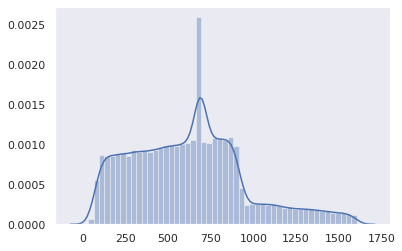

In [38]:
q1 = user_by_total_volume.quantile(0.25)
q3 = user_by_total_volume.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_total_volume[~((user_by_total_volume<lower_whisk)|(user_by_total_volume>upper_whisk))]
#non_outliers.fillna(telecom_gaming.mean())
non_outliers.fillna(user_by_total_volume.mean(),inplace=True)
user_by_total_volume = non_outliers
sns.distplot(user_by_total_volume)
user_by_total_volume.describe()

In [39]:
telecom['Total_other_bytes'] = (telecom['Other DL (Bytes)'] + telecom['Other UL (Bytes)']) * (10**-6)

       Total_other_bytes
count      106856.000000
mean          598.508764
std           448.922110
min             0.149045
25%           285.559911
50%           539.832343
75%           775.397531
max          8167.877776


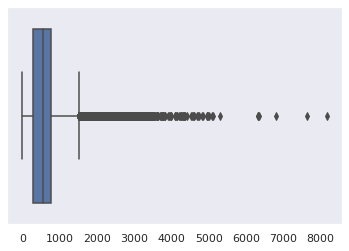

In [40]:
user_by_other = telecom.pivot_table(index='MSISDN/Number',values='Total_other_bytes',aggfunc='sum')
print(user_by_other.describe())
sns.boxplot(user_by_other)

,Total_other_bytes
count,106856.000000
mean,540.409631
std,323.775027
min,0.149045
25%,285.559911
50%,539.832343
75%,737.206938
max,1509.954977


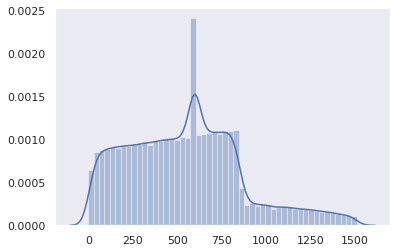

In [41]:
q1 = user_by_other.quantile(0.25)
q3 = user_by_other.quantile(0.75)
iqr = q3-q1
lower_whisk = q1-1.5*iqr
upper_whisk = q3+1.5*iqr
non_outliers = user_by_other[~((user_by_other<lower_whisk)|(user_by_other>upper_whisk))]
#non_outliers.fillna(user_by_other.mean())
non_outliers.fillna(user_by_other.mean(),inplace=True)
user_by_other= non_outliers
sns.distplot(user_by_other)
user_by_other.describe()

In [42]:
df = pd.concat([telecom_gaming,telecom_netflix,user_by_youtube,user_by_email,user_by_google,user_by_social_media,user_by_total_volume,user_by_other,user_per_dur,user_per_session_number],axis=1)

In [43]:
df.columns

Index(['Total_gaming_bytes', 'Total_netflix_bytes', 'Total_youtube_bytes',
       'Total_email_bytes', 'Total_google_bytes', 'Total_socialmedia_bytes',
       'Total_volume_bytes', 'Total_other_bytes', 'Dur. (ms).1', 'Bearer Id'],
      dtype='object')

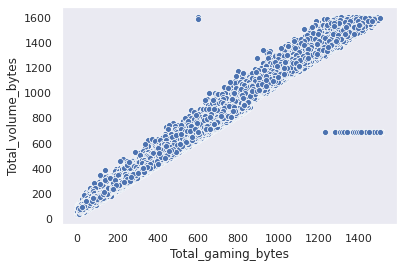

In [44]:
sns.scatterplot(x='Total_gaming_bytes',y='Total_volume_bytes',data=df)

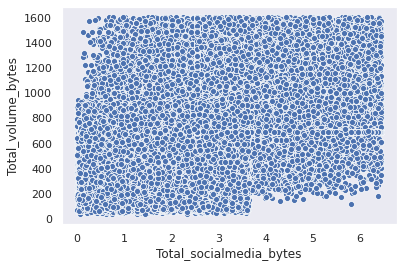

In [45]:
sns.scatterplot(x='Total_socialmedia_bytes',y='Total_volume_bytes',data=df)

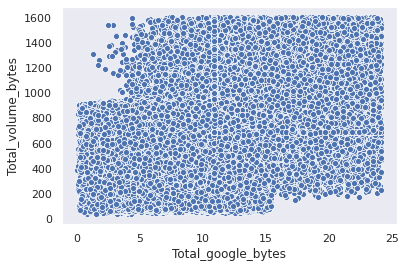

In [46]:
sns.scatterplot(x='Total_google_bytes',y='Total_volume_bytes',data=df)

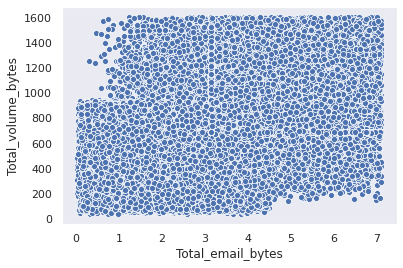

In [47]:
sns.scatterplot(x='Total_email_bytes',y='Total_volume_bytes',data=df)

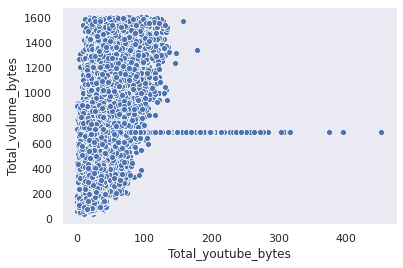

In [48]:
sns.scatterplot(x='Total_youtube_bytes',y='Total_volume_bytes',data=df)

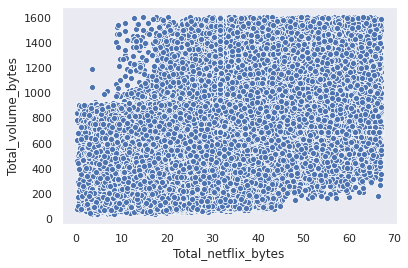

In [49]:
sns.scatterplot(x='Total_netflix_bytes',y='Total_volume_bytes',data=df)

In [50]:
df.reset_index(inplace=True)

In [51]:
df.head()

,MSISDN/Number,Total_gaming_bytes,Total_netflix_bytes,Total_youtube_bytes,Total_email_bytes,Total_google_bytes,Total_socialmedia_bytes,Total_volume_bytes,Total_other_bytes,Dur. (ms).1,Bearer Id
0,3.360100e+10,812.458661,27.180981,21.624548,1.331362,4.389005,2.232135,878.690574,386.570872,1.945336,1
1,3.360100e+10,119.750078,11.221763,12.432223,3.307781,5.334863,2.660565,156.859643,281.710071,3.020516,1
2,3.360100e+10,538.827713,19.353900,21.333570,3.205380,3.443126,3.195623,595.966483,501.693672,2.249490,1
3,3.360101e+10,391.126127,1.942092,6.977321,2.284670,9.678493,0.280294,422.320698,35.279702,0.831300,1
4,3.360101e+10,1314.797820,49.201724,41.533002,3.305469,18.499616,2.912542,1457.410944,804.804484,0.618408,2


In [52]:
msisdn_gaming=df[['MSISDN/Number','Total_gaming_bytes','Total_volume_bytes']]

In [53]:
msisdn_sorted_gaming= msisdn_gaming.sort_values(by='Total_gaming_bytes',ascending=False)
msisdn_sorted_gaming.reset_index(drop=True,inplace=True)

In [54]:
index_list = []
another_index_list = []
for index,row in msisdn_sorted_gaming.iterrows():
  index_list.append(index)
for i in index_list:
  if i in range(0,10):
    another_index_list.append(1)
  elif i in range(10,20):
    another_index_list.append(2)
  elif i in range(20,30):
    another_index_list.append(3)
  elif i in range(30,40):
    another_index_list.append(4)
  elif i in range(40,50):
    another_index_list.append(5)
  else:
    another_index_list.append(6)


In [55]:
msisdn_sorted_gaming['Decile_ranking'] = another_index_list

In [56]:
msisdn_sorted_gaming.groupby('Decile_ranking')['Total_volume_bytes'].sum().reset_index().head()

,Decile_ranking,Total_volume_bytes
0,1,6909.621033
1,2,6909.621033
2,3,6909.621033
3,4,6909.621033
4,5,7816.518559


In [57]:
msisdn_sorted_gaming.head(20)

,MSISDN/Number,Total_gaming_bytes,Total_volume_bytes,Decile_ranking
0,3.376090e+10,1511.138983,690.962103,1
1,3.366043e+10,1510.944129,690.962103,1
2,3.369941e+10,1510.560262,690.962103,1
3,3.366047e+10,1510.433530,690.962103,1
4,3.360103e+10,1510.270398,690.962103,1
5,3.376228e+10,1510.083817,690.962103,1
6,3.366379e+10,1510.070355,690.962103,1
7,3.362318e+10,1509.552313,690.962103,1
8,3.366945e+10,1509.482539,690.962103,1
9,3.378213e+10,1509.304866,690.962103,1


In [58]:
msisdn_sorted_gaming['Decile_ranking'] = pd.qcut(msisdn_sorted_gaming['Total_gaming_bytes'],10,labels=False)

In [59]:
#total_gaming_bytes by total_volume_bytes decile
msisdn_sorted_gaming.groupby('Decile_ranking')['Total_volume_bytes'].sum().head(5)

Decile_ranking
0    1.411895e+06
1    2.645928e+06
2    3.831956e+06
3    4.983861e+06
4    6.077480e+06
Name: Total_volume_bytes, dtype: float64

In [60]:
def decile_ranking(df,col1,col2):
  col_1 = df[[col1,col2]]
  col_1_sorted = col_1.sort_values(by=col1,ascending=False)
  col_1_sorted['Decile_ranking'] = pd.qcut(col_1_sorted[col1],10,labels=False)
  return col_1_sorted.groupby('Decile_ranking')[col2].sum().head(5)

In [61]:
#total_netflix_bytes by total_volume_bytes decile
total_netflix_decile = decile_ranking(df,'Total_netflix_bytes','Total_volume_bytes')
total_netflix_decile

Decile_ranking
0    5.195592e+06
1    5.286730e+06
2    5.431635e+06
3    5.531046e+06
4    5.694101e+06
Name: Total_volume_bytes, dtype: float64

In [62]:
# total_youtube_bytes by total_volume_bytes decile
total_youtube_decile = decile_ranking(df,'Total_youtube_bytes','Total_volume_bytes')
total_youtube_decile

Decile_ranking
0    5.195598e+06
1    5.313731e+06
2    5.401610e+06
3    5.536479e+06
4    5.662986e+06
Name: Total_volume_bytes, dtype: float64

In [63]:
#email_bytes by total_volume_bytes decile
decile_ranking(df,'Total_email_bytes','Total_volume_bytes')

Decile_ranking
0    5.300158e+06
1    5.428226e+06
2    5.594689e+06
3    5.755992e+06
4    5.874358e+06
Name: Total_volume_bytes, dtype: float64

In [64]:
#google_bytes by total_volume_bytes decile
decile_ranking(df,'Total_google_bytes','Total_volume_bytes')

Decile_ranking
0    5.281245e+06
1    5.368292e+06
2    5.482459e+06
3    5.680628e+06
4    5.857022e+06
Name: Total_volume_bytes, dtype: float64

In [65]:
# social_media_bytes by total_volume_bytes decile
decile_ranking(df,'Total_socialmedia_bytes','Total_volume_bytes')

Decile_ranking
0    5.398073e+06
1    5.491891e+06
2    5.728758e+06
3    5.813860e+06
4    6.003748e+06
Name: Total_volume_bytes, dtype: float64

In [66]:
# other_bytes by total_volume_bytes decile
decile_ranking(df,'Total_other_bytes','Total_volume_bytes')

Decile_ranking
0    5.391309e+06
1    5.576232e+06
2    5.736827e+06
3    5.887995e+06
4    5.999263e+06
Name: Total_volume_bytes, dtype: float64

In [67]:
#correlation for netflix,youtube,other,email,google,socialmedia
corr=df[['Total_netflix_bytes','Total_youtube_bytes','Total_email_bytes','Total_google_bytes','Total_socialmedia_bytes','Total_other_bytes','Total_volume_bytes']].corr()
corr

,Total_netflix_bytes,Total_youtube_bytes,Total_email_bytes,Total_google_bytes,Total_socialmedia_bytes,Total_other_bytes,Total_volume_bytes
Total_netflix_bytes,1.000000,0.388762,0.407356,0.420126,0.375766,0.366601,0.414841
Total_youtube_bytes,0.388762,1.000000,0.370629,0.379032,0.367114,0.362435,0.383383
Total_email_bytes,0.407356,0.370629,1.000000,0.389032,0.353952,0.344676,0.369605
Total_google_bytes,0.420126,0.379032,0.389032,1.000000,0.360036,0.354909,0.386787
Total_socialmedia_bytes,0.375766,0.367114,0.353952,0.360036,1.000000,0.325829,0.347588
Total_other_bytes,0.366601,0.362435,0.344676,0.354909,0.325829,1.000000,0.339995
Total_volume_bytes,0.414841,0.383383,0.369605,0.386787,0.347588,0.339995,1.000000


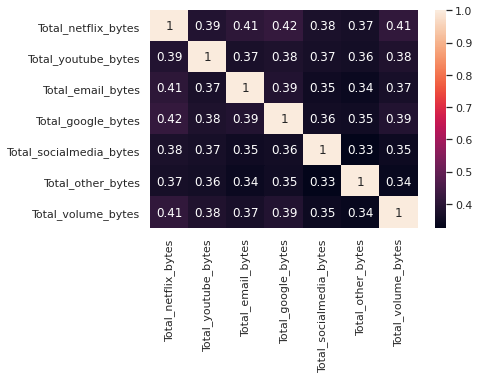

In [68]:
sns.heatmap(corr,annot=True,fmt='.2g')

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaled_data = scaler.transform(df)

In [71]:
from sklearn.decomposition import PCA


In [72]:
pca = PCA(n_components=5)

In [73]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
x_pca =pca.transform(scaled_data)


In [75]:
scaled_data.shape

(106856, 11)

In [76]:
x_pca.shape

(106856, 5)

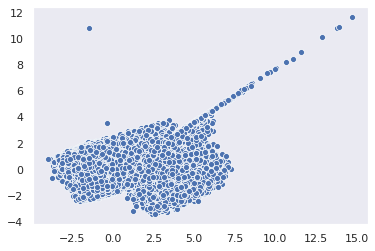

In [77]:
sns.scatterplot(x_pca[:,0],x_pca[:,1])

In [78]:
pca_explained_variance=pca.explained_variance_ratio_
len(pca_explained_variance)

5

In [79]:
cat_plot = np.array(list(range(1,len(pca_explained_variance)+1)))
cat_plot

array([1, 2, 3, 4, 5])

Text(0, 0.5, '% of variance ratio')

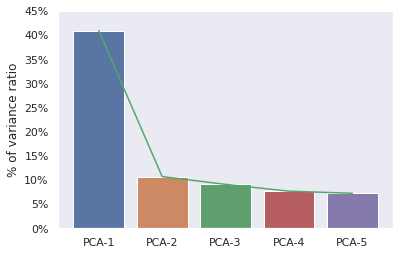

In [80]:
sns.barplot(x=cat_plot,y=(pca_explained_variance)*100)
plt.plot((pca_explained_variance)*100,c='g')
plt.yticks(range(0,50,5),[ str(i)+'%' for i in range(0,50,5)])
plt.xticks(range(0,5),["PCA-"+str(i) for i in range(1,6)])
plt.ylabel('% of variance ratio')

It can be seen that pca-1,pca-2 and pca-3 explains most of the variance than subsequent components. In other words, most of the features are captured by PCA-1,PCA-2 and PCA-3

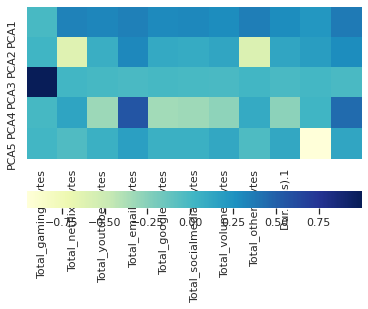

In [81]:
columns_dropped = ['MSISDN/Number','Bearer Id']
ax= sns.heatmap(pca.components_,cmap='YlGnBu',yticklabels=["PCA"+str(x) for x in range(1,(pca.n_components)+1)],xticklabels=list(df.drop(columns_dropped,axis=1).columns),cbar_kws = {'orientation':'horizontal'})
ax.set_aspect("equal")

In [82]:
!pip install pca


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6eef95987a96f2177f5610195b685e002b810830da5ee52e7e0b7ea97a5325bd
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [83]:
from pca import pca
model = pca(n_components =3)


In [84]:
results = model.fit_transform(scaled_data)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


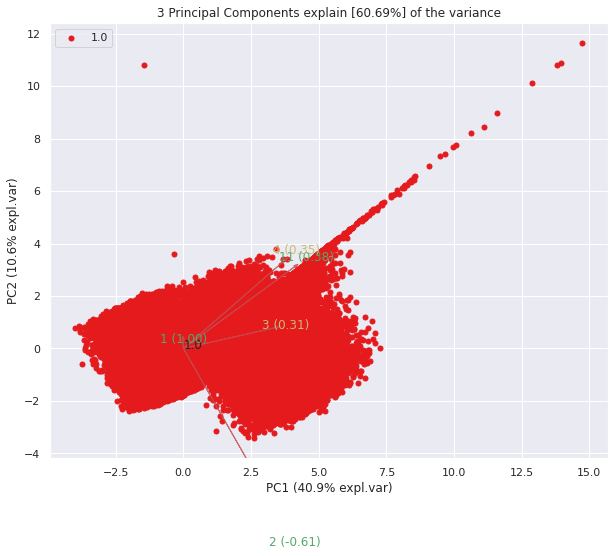

In [85]:
fig,ax = model.biplot(n_feat=5)

In [86]:
telecom.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [87]:
user_per_dur.reset_index(inplace=True )

In [88]:
df2 = pd.concat([user_per_session_number,user_per_dur,telecom['Total_volume_bytes']],axis=1)

In [89]:
df2.drop('MSISDN/Number',axis=1,inplace=True)

In [90]:
user_per_session_number.reset_index(inplace=True)

In [91]:
user_by_total_volume.reset_index(inplace=True)

In [92]:
df2 = pd.concat([user_per_session_number,user_per_dur,user_by_total_volume],axis=1)

In [93]:
df2.columns = ['MSISDN/Number','Session_frequency','delete','session_dur','another_delete','Total_volume_bytes']
df2.head()

,MSISDN/Number,Session_frequency,delete,session_dur,another_delete,Total_volume_bytes
0,3.360100e+10,1,3.360100e+10,1.945336,3.360100e+10,878.690574
1,3.360100e+10,1,3.360100e+10,3.020516,3.360100e+10,156.859643
2,3.360100e+10,1,3.360100e+10,2.249490,3.360100e+10,595.966483
3,3.360101e+10,1,3.360101e+10,0.831300,3.360101e+10,422.320698
4,3.360101e+10,2,3.360101e+10,0.618408,3.360101e+10,1457.410944


In [94]:
df2.drop(['delete','another_delete'],axis=1,inplace=True)

In [95]:
df2.head()

,MSISDN/Number,Session_frequency,session_dur,Total_volume_bytes
0,3.360100e+10,1,1.945336,878.690574
1,3.360100e+10,1,3.020516,156.859643
2,3.360100e+10,1,2.249490,595.966483
3,3.360101e+10,1,0.831300,422.320698
4,3.360101e+10,2,0.618408,1457.410944


In [96]:
#top 10 users based on session_frequency, session_dur,total_volume_bytes
top_10_users= df2.sort_values(by=(['Session_frequency','session_dur','Total_volume_bytes']),ascending=(False,False,False)).head(10).reset_index(drop=True)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)

In [98]:
scaled_df

array([[-3.98480544e-03, -4.88564203e-01, -8.22921243e-04,
         7.81688835e-01],
       [-3.98480542e-03, -4.88564203e-01,  9.44771278e-01,
        -1.38612667e+00],
       [-3.98480516e-03, -4.88564203e-01,  2.66672811e-01,
        -6.73931875e-02],
       ...,
       [ 1.09084769e+00, -4.88564203e-01,  4.30820103e-01,
        -1.16009150e+00],
       [ 1.16617210e+02, -4.88564203e-01,  1.99719845e+00,
        -6.64281305e-02],
       [ 3.05374461e+02, -4.88564203e-01,  4.30820103e-01,
        -1.43930163e+00]])

In [99]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


In [100]:
y_predicted=km.fit_predict(scaled_df[:,1:])

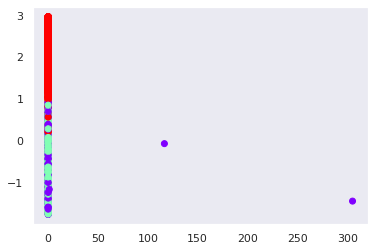

In [101]:
plt.scatter(scaled_df[:,0],scaled_df[:,3],c=list(y_predicted),cmap='rainbow')

In [102]:
print(list(y_predicted))

[1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 

In [103]:
df3 = df2
df3['cluster_labels']= list(y_predicted)

In [104]:
df3.groupby('cluster_labels')['Session_frequency','Total_volume_bytes','session_dur'].min().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster_labels,Session_frequency,Total_volume_bytes,session_dur
0,0,1,33.575840,1.889242
1,1,1,33.249009,0.119050
2,2,2,284.218230,0.366579


In [105]:
df3.groupby('cluster_labels')["Session_frequency",'Total_volume_bytes','session_dur'].max().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster_labels,Session_frequency,Total_volume_bytes,session_dur
0,0,2,950.760661,5.416081
1,1,2,1123.552652,1.996423
2,2,18,1605.748767,5.416524


In [106]:
df3.groupby('cluster_labels')["Session_frequency",'Total_volume_bytes','session_dur'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster_labels,Session_frequency,Total_volume_bytes,session_dur
0,0,1.140826,503.525511,2.862557
1,1,1.050546,506.356191,1.100029
2,2,2.583382,1049.301259,2.850154


In [107]:
df3.groupby('cluster_labels')["Session_frequency",'Total_volume_bytes','session_dur'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster_labels,Session_frequency,Total_volume_bytes,session_dur
0,0,33376,1.473114e+07,83746.971703
1,1,58195,2.804960e+07,60936.129487
2,2,57364,2.329973e+07,63287.671546


In [108]:
# already aggregrated by user
df_apps = telecom[['MSISDN/Number','Total_socialmedia_bytes','Total_gaming_bytes','Total_netflix_bytes','Total_youtube_bytes','Total_email_bytes','Total_google_bytes','Total_other_bytes']]

In [109]:

df_apps.head()

,MSISDN/Number,Total_socialmedia_bytes,Total_gaming_bytes,Total_netflix_bytes,Total_youtube_bytes,Total_email_bytes,Total_google_bytes,Total_other_bytes
0,3.366496e+10,1.570185,292.426453,17.855187,18.355943,3.701304,2.905912,180.558843
1,3.368185e+10,1.933278,609.920783,35.565545,39.359124,0.937385,4.414096,541.959383
2,3.376063e+10,1.726277,229.980251,23.751202,34.425237,3.363124,10.229119,414.908351
3,3.375034e+10,0.657493,810.387875,15.092588,36.534765,2.070983,11.811761,761.837216
4,3.369980e+10,0.912788,531.237049,17.539799,34.222253,2.110349,7.748843,564.619822


In [110]:
sorting_columns=['Total_socialmedia_bytes','Total_gaming_bytes','Total_netflix_bytes','Total_youtube_bytes','Total_email_bytes','Total_google_bytes','Total_other_bytes']

In [111]:
dictionary_bytes = {}
for i in sorting_columns:
  dictionary_bytes[i] = df_apps[['MSISDN/Number',i]].sort_values(i,ascending=False).reset_index(drop=True).head(10)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

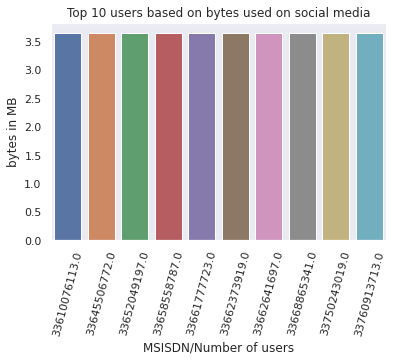

In [112]:
top_10_socialmedia=dictionary_bytes['Total_socialmedia_bytes']
sns.barplot(x='MSISDN/Number',y='Total_socialmedia_bytes',data=top_10_socialmedia)
plt.ylabel('bytes in MB')
plt.xlabel('MSISDN/Number of users')
plt.title('Top 10 users based on bytes used on social media')
plt.xticks(rotation=75)

In [113]:
x = 'MSISDN/Number'
xlabel = 'MSISDN/Number of Users'
ylabel='Bytes in MB'

Text(0.5, 1.0, 'Top 10 users based on MB spent on gaming')

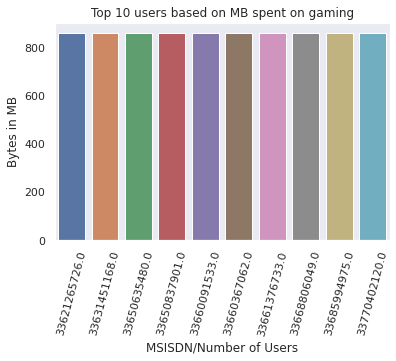

In [114]:
top_10_gaming= dictionary_bytes['Total_gaming_bytes']
sns.barplot(x=x,y='Total_gaming_bytes',data=top_10_gaming)
plt.xticks(rotation=75)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Top 10 users based on MB spent on gaming')

Text(0.5, 1.0, 'Top 10 users based on MB spent on Netflix')

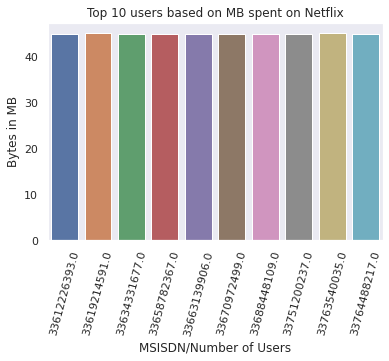

In [115]:
top_10_netflix = dictionary_bytes['Total_netflix_bytes']
sns.barplot(x=x,y='Total_netflix_bytes',data=top_10_netflix)
plt.xticks(rotation=75)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Top 10 users based on MB spent on Netflix')

Text(0.5, 1.0, '10 top users based on mb spent on youtube')

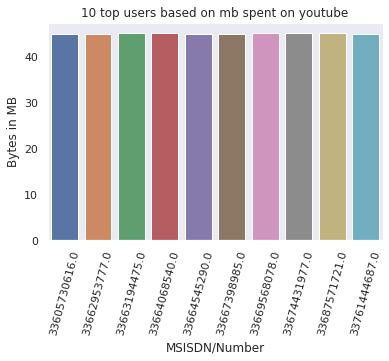

In [116]:
top_10_youtube = dictionary_bytes['Total_youtube_bytes']
sns.barplot(x=x,y='Total_youtube_bytes',data=top_10_youtube)
plt.xlabel(x)
plt.ylabel(ylabel)
plt.xticks(rotation=75)
plt.title('10 top users based on mb spent on youtube')

Text(0.5, 1.0, '10 top users based on mb spent on email')

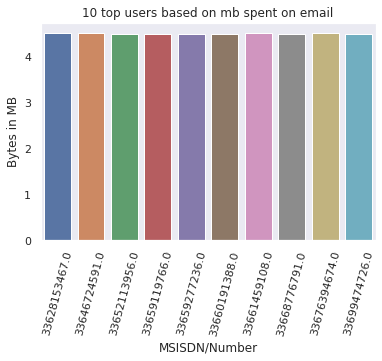

In [117]:
top_10_email = dictionary_bytes['Total_email_bytes']
sns.barplot(x=x,y='Total_email_bytes',data=top_10_email)
plt.xlabel(x)
plt.ylabel(ylabel)
plt.xticks(rotation=75)
plt.title('10 top users based on mb spent on email')

Text(0.5, 1.0, '10 top users based on mb spent on google')

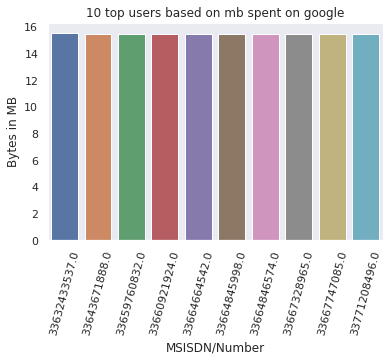

In [118]:
top_10_google = dictionary_bytes['Total_google_bytes']
sns.barplot(x=x,y='Total_google_bytes',data=top_10_google)
plt.xlabel(x)
plt.ylabel(ylabel)
plt.xticks(rotation=75)
plt.title('10 top users based on mb spent on google')

Text(0.5, 1.0, '10 top users based on mb spent on other applications')

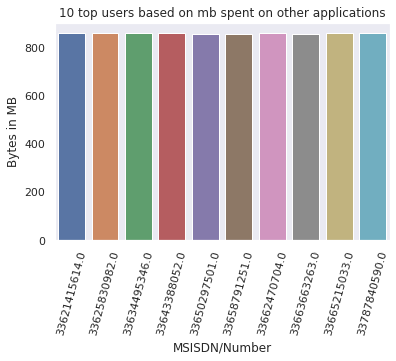

In [119]:
top_10_other = dictionary_bytes['Total_other_bytes']
sns.barplot(x=x,y='Total_other_bytes',data=top_10_other)
plt.xlabel(x)
plt.ylabel(ylabel)
plt.xticks(rotation=75)
plt.title('10 top users based on mb spent on other applications')

In [120]:
df_apps_without_mss = df_apps.drop('MSISDN/Number',axis=1)

In [121]:
df_sum= df_apps_without_mss.sum(axis=0).reset_index()
df_sum.columns = ['app_name','Values']

In [122]:
df_sum_sorted=df_sum.sort_values('Values',ascending=False).head(3).reset_index(drop=True)
df_sum_sorted

,app_name,Values
0,Total_gaming_bytes,6.408892e+07
1,Total_other_bytes,6.395425e+07
2,Total_youtube_bytes,3.372204e+06


In [123]:
df_sum_sorted=df_sum_sorted.replace({'Total_gaming_bytes':'Gaming','Total_other_bytes':'Others','Total_youtube_bytes':'Youtube'})
df_sum_sorted

,app_name,Values
0,Gaming,6.408892e+07
1,Others,6.395425e+07
2,Youtube,3.372204e+06


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

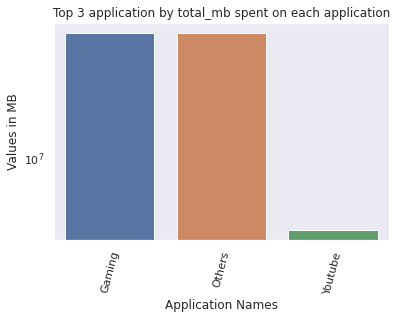

In [124]:
sns.barplot(x='app_name',y='Values',data=df_sum_sorted)
plt.yscale('log')
plt.ylabel('Values in MB')
plt.xlabel('Application Names')
plt.title("Top 3 application by total_mb spent on each application")
plt.xticks(rotation=75)

In [131]:
sse=[]
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(scaled_df[:,1:])
  sse.append(km.inertia_)

In [132]:
print(sse)

[320568.0, 189075.37606605396, 148618.0281787086, 121524.01007485701, 96534.42616682909, 83388.10848808089, 74105.75403704023, 65952.20449548091, 59790.567528529216, 55277.9284755162]


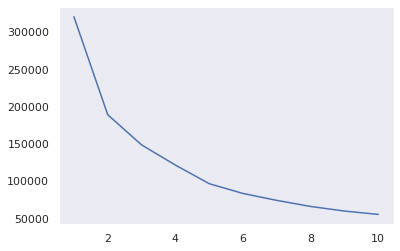

In [135]:
sns.lineplot(range(1,11),sse)

The optimum k value according to the elbow theorem is 5

In [139]:
#using n_clusters as 5
km5 = KMeans(n_clusters=5)
km5_predicted = km5.fit_predict(scaled_df[:,1:])
df4=df2
df4['cluster'] = km5_predicted

In [141]:
df4.drop('cluster_labels',axis=1,inplace=True)

In [144]:
df4.groupby('cluster')['MSISDN/Number','Session_frequency','session_dur','Total_volume_bytes'].max().head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MSISDN/Number,Session_frequency,session_dur,Total_volume_bytes
cluster,,,,
0,3.379000e+10,2,2.500977,1391.960474
1,8.823971e+14,2,2.664590,521.876205
2,3.378998e+10,3,5.416524,1605.748767
3,3.370000e+14,2,5.416081,949.172538
4,3.378988e+10,18,5.415851,1604.975213


In [182]:
average_tcp_per_user = pd.pivot_table(data=telecom,values='Average_TCP_retrans',index='MSISDN/Number',aggfunc=sum).reset_index()

In [183]:
average_throughput_per_user = pd.pivot_table(data=telecom,values='Average_throughput',index='MSISDN/Number',aggfunc=sum).reset_index()

In [184]:
average_rtt_user = pd.pivot_table(data=telecom,values='Average_RTT_total',index='MSISDN/Number',aggfunc=sum).reset_index()

In [194]:
handset_type_user = telecom.groupby(['MSISDN/Number','Handset Type'])['Handset Type'].count()

In [195]:
handset_type_user

MSISDN/Number  Handset Type                    
3.360100e+10   Huawei P20 Lite Huawei Nova 3E      1
               Apple iPhone 7 (A1778)              1
               undefined                           1
3.360101e+10   Apple iPhone 5S (A1457)             1
               Apple iPhone Se (A1723)             2
                                                  ..
3.379000e+10   Huawei Honor 9 Lite                 1
               Apple iPhone 8 Plus (A1897)         1
3.197021e+12   Quectel Wireless. Quectel Ec25-E    1
3.370000e+14   Huawei B525S-23A                    1
8.823971e+14   Quectel Wireless. Quectel Ec21-E    1
Name: Handset Type, Length: 106862, dtype: int64

In [190]:
average_tcp_per_user.nlargest(10,columns='Average_TCP_retrans').reset_index(drop=True)

,MSISDN/Number,Average_TCP_retrans
0,3.366773e+10,8354.209105
1,3.365908e+10,7941.860302
2,3.376128e+10,6043.978448
3,3.376264e+10,5879.989037
4,3.365066e+10,5593.366107
5,3.366318e+10,5566.928580
6,3.366905e+10,5200.010699
7,3.376357e+10,5179.458974
8,3.365864e+10,5165.856986
9,3.376386e+10,5095.685475


In [191]:
average_tcp_per_user.nsmallest(10,columns='Average_TCP_retrans').reset_index(drop=True)

,MSISDN/Number,Average_TCP_retrans
0,3.365013e+10,0.000097
1,3.361478e+10,0.000128
2,3.376206e+10,0.000129
3,3.362636e+10,0.000134
4,3.360783e+10,0.000143
5,3.365068e+10,0.000176
6,3.376964e+10,0.000176
7,3.378420e+10,0.000177
8,3.367937e+10,0.000179
9,3.369969e+10,0.000182


In [196]:
average_tcp_per_user.nlargest(1,columns='Average_TCP_retrans').reset_index(drop=True)

,MSISDN/Number,Average_TCP_retrans
0,3.366773e+10,8354.209105


In [198]:
average_throughput_per_user.nlargest(10,columns='Average_throughput').reset_index(drop=True)

,MSISDN/Number,Average_throughput
0,3.376233e+10,902.222
1,3.366871e+10,840.424
2,3.365955e+10,798.342
3,3.366995e+10,690.815
4,3.366843e+10,676.858
5,3.369817e+10,618.797
6,3.362570e+10,564.179
7,3.365808e+10,550.352
8,3.376264e+10,549.661
9,3.366566e+10,530.353


In [199]:
average_throughput_per_user.nsmallest(10,columns='Average_throughput').reset_index(drop=True)

,MSISDN/Number,Average_throughput
0,3.360345e+10,0.0
1,3.360413e+10,0.0
2,3.360851e+10,0.0
3,3.360875e+10,0.0
4,3.360889e+10,0.0
5,3.360985e+10,0.0
6,3.361064e+10,0.0
7,3.361152e+10,0.0
8,3.361611e+10,0.0
9,3.361661e+10,0.0


In [201]:
average_throughput_per_user.nlargest(1,columns='Average_throughput').reset_index(drop=True)

,MSISDN/Number,Average_throughput
0,3.376233e+10,902.222


In [202]:
average_rtt_user.nlargest(10,columns='Average_RTT_total').reset_index(drop=True)

,MSISDN/Number,Average_RTT_total
0,3.366232e+10,0.096924
1,3.366087e+10,0.064670
2,3.368369e+10,0.054848
3,3.369855e+10,0.046021
4,3.376181e+10,0.037084
5,3.366879e+10,0.036304
6,3.376094e+10,0.027278
7,3.360679e+10,0.026300
8,3.367182e+10,0.025715
9,3.378187e+10,0.025388


In [203]:
average_rtt_user.nsmallest(10,columns='Average_RTT_total').reset_index(drop=True)

,MSISDN/Number,Average_RTT_total
0,3.365298e+10,0.000000
1,3.366158e+10,0.000000
2,3.366020e+10,0.000002
3,3.369505e+10,0.000004
4,3.365949e+10,0.000005
5,3.366862e+10,0.000006
6,3.364768e+10,0.000008
7,3.361085e+10,0.000009
8,3.367220e+10,0.000009
9,3.363468e+10,0.000010


In [204]:
average_rtt_user.nlargest(1,columns='Average_RTT_total').reset_index(drop=True)

,MSISDN/Number,Average_RTT_total
0,3.366232e+10,0.096924


In [227]:
avg_throughput_per_handset=telecom.groupby('Handset Type')['Average_throughput'].sum().reset_index()
avg_15_tp=avg_throughput_per_handset.sort_values('Average_throughput',ascending=False).reset_index(drop=True).head(15)
avg_15_tp

,Handset Type,Average_throughput
0,Huawei B528S-23A,832626.680
1,undefined,89424.670
2,Apple iPhone 7 (A1778),76769.459
3,Apple iPhone 6S (A1688),74118.773
4,Apple iPhone 6 (A1586),68596.814
5,Huawei E5180,64208.823
6,Apple iPhone Xr (A2105),62367.607
7,Samsung Galaxy S8 (Sm-G950F),62194.400
8,Apple iPhone 8 (A1905),57739.501
9,Apple iPhone X (A1901),56920.948


Text(0.5, 1.0, 'distribution of average throughput per handset type')

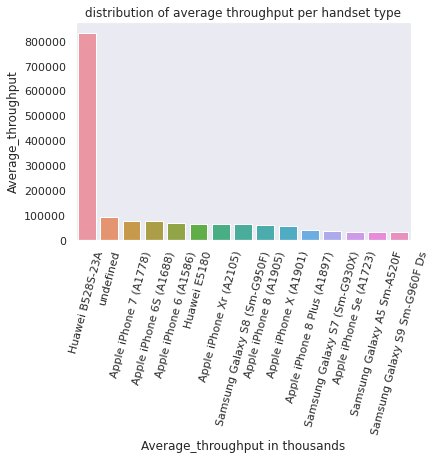

In [230]:
sns.barplot(x='Handset Type',y='Average_throughput',data=avg_15_tp)
plt.xticks(rotation=75)
plt.xlabel('Average_throughput in thousands')
plt.title('distribution of average throughput per handset type')

In [231]:
telecom.groupby('Handset Type')['Average_TCP_retrans'].sum()

Handset Type
A-Link Telecom I. Cubot A5                                                                 25.795735
A-Link Telecom I. Cubot Note Plus                                                           0.616213
A-Link Telecom I. Cubot Note S                                                             41.411731
A-Link Telecom I. Cubot Nova                                                                0.137170
A-Link Telecom I. Cubot Power                                                               0.008041
                                                                                           ...      
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809        51.591470
Zyxel Communicat. Lte7460                                                                  41.276546
Zyxel Communicat. Sbg3600                                                                  53.486938
Zyxel Communicat. Zyxel Wah7706                                               

In [239]:
engage_exp= pd.concat([df2,average_tcp_per_user,average_throughput_per_user,average_rtt_user],axis=1)
engage_exp.columns
engage_exp.columns= ['MSISDN/Number', 'Session_frequency', 'session_dur','Total_volume_bytes', 'delete', 'delete', 'Average_TCP_retrans','delete', 'Average_throughput', 'delete','Average_RTT_total']

In [241]:
engage_exp.drop('delete',axis=1,inplace=True)

In [242]:
eng_df = pd.concat([average_tcp_per_user,average_rtt_user,average_throughput_per_user])

In [248]:
dict_fill= eng_df[['Average_TCP_retrans','Average_RTT_total','Average_throughput']].mean().to_dict()

In [250]:
eng_df.fillna(dict_fill,inplace=True)

In [253]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)
predicted_values=km.fit_predict(eng_df)

In [254]:
eng_df['cluster'] = predicted_values

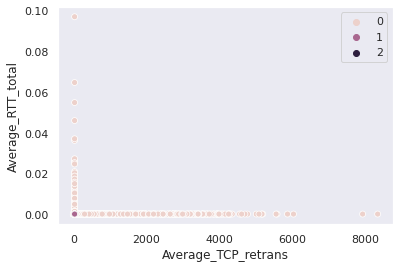

In [255]:
sns.scatterplot(x='Average_TCP_retrans',y="Average_RTT_total",data=eng_df,hue=predicted_values)

In [268]:
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist
# df = pd.DataFrame({'Type1': [0.0, 0.0, 473.6, 0.0, 0.0],
#  'Type2': [0.0, 63.72, 174.0, 996.0, 524.91],
#  'Type3': [0.0, 0.0, 31.6, 160.92, 0.0],
#  'id': [1000, 10001, 10002, 10003, 10004]})
points = eng_df.drop(['cluster','MSISDN/Number'], axis=1)
scaler = StandardScaler()
# or points = df[['Type1', 'Type2', 'Type3']]
kmeans = cluster.KMeans(n_clusters=5, random_state=0).fit(scaler.fit_transform(points))
points['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points.reshape(-1,1), centroids.reshape(1,-1)), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=points.index)
df = pd.concat([points, dists], axis=1)
print(df)


AttributeError: ignored